# $$\textit{Bayes} \text{ (pronounced BAE$\cdot$z)}$$

$$\text{Schwartz}$$

# Bayes' Rule for Events

# $$p(E_2|E_1) = \frac{p(E_1 \cap E_2)}{p(E_1)} = \frac{p(E_1|E_2)p(E_2)}{p(E_1)}$$

<img src="stuff/v16.png" width="350px" align="left">

# But it also works for Random Variables (so let's call it Bayes' Formula)
# $$p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)} = \frac{p(X,Y)}{p(X)}$$

# But Bayesians view  Parameters as Random Variables (so let's call it Bayes' Theorem)
# $$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)} = \frac{p(X,\theta)}{p(X)}$$

# Bayes' Theorem is the formula for _learning_...

# $\begin{align}
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\{}\\ 
\text{Posterior} &= \frac{\text{Likelihood}\times\text{prior}}{\text{Marginal Likelihood}} 
\end{align}$

## _"The posterior is proportional to the likelihood times the prior"_
#### _(the marginal likelihood is just a normalizing constant)_

## $\begin{align}
\text{Posterior} &= \\
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\ 
&= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{c} \propto  p(X_1,X_2,\cdots,X_n|\theta)p(\theta)\\
& \hspace{11.5em} \text{Likelihood } \times \text{prior}
\end{align}$



<img src="stuff/bayes.png" width="750px" align="left">

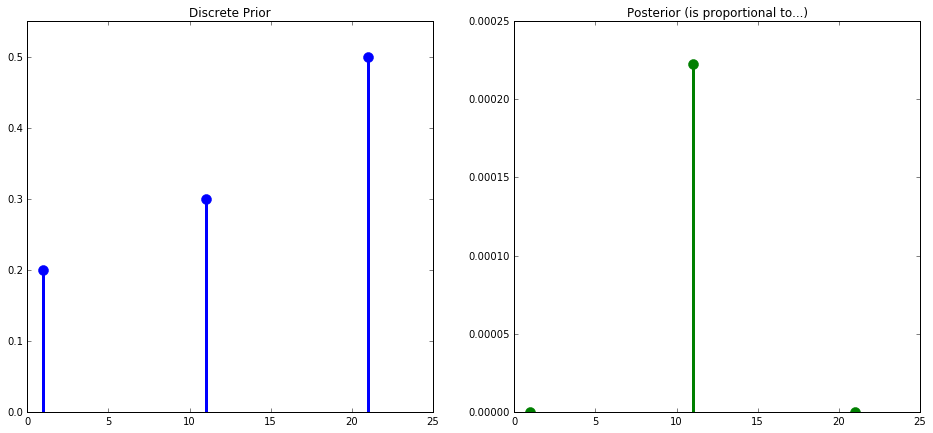

In [321]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = (16, 7)
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.vlines(np.array([1, 11, 21]), ymin=0, ymax=np.array([.2, .3, .5]), linewidth=3, color='b')
plt.title("Discrete Prior")
ax1.plot(np.array([1, 11, 21]), np.array([.2, .3, .5]), 'b.', ms=20)
plt.ylim([0, .55])

ax2 = fig.add_subplot(122)

posterior_prop = [stats.poisson.pmf(4, 1)*stats.poisson.pmf(14, 1)*.2, 
                  stats.poisson.pmf(4, 11)*stats.poisson.pmf(14, 11)*.3, 
                  stats.poisson.pmf(4, 21)*stats.poisson.pmf(14, 21)*.5]

ax2.vlines(np.array([1, 11, 21]), ymin=0, ymax=np.array(posterior_prop), linewidth=3, color='g')
plt.title("Posterior (is proportional to...)")
ax2.plot(np.array([1, 11, 21]), np.array(posterior_prop), 'g.', ms=20)

# $$ x_1=4,x_2=14 $$

# $$p(X_i|\theta) = \frac{\theta^{x_i} e^{-\theta}}{x_i!}$$

# $$
\begin{align}
\color{green}{p}(\color{blue}{\theta=1}|\color{orange}{x_1=4,x_2=14}) & \color{green}{\propto}  \frac{\color{blue}{1}^{\color{orange}{4}} e^{-\color{blue}{1}}}{\color{orange}{4}!}\frac{\color{blue}{1}^{\color{orange}{14}} e^{-\color{blue}{1}}}{\color{orange}{14}!} \times \color{blue}{.2} \\{}\\
\color{green}{p}(\color{blue}{\theta=11}|\color{orange}{x_1=4,x_2=14}) & \color{green}{\propto}  \frac{\color{blue}{11}^{\color{orange}{4}} e^{-\color{blue}{11}}}{\color{orange}{4}!}\frac{\color{blue}{11}^{\color{orange}{14}} e^{-\color{blue}{11}}}{\color{orange}{14}!} \times \color{blue}{.3} \\{}\\
\color{green}{p}(\color{blue}{\theta=21}|\color{orange}{x_1=4,x_2=14}) & \color{green}{\propto}  \frac{\color{blue}{21}^{\color{orange}{4}} e^{-\color{blue}{21}}}{\color{orange}{4}!}\frac{\color{blue}{21}^{\color{orange}{14}} e^{-\color{blue}{21}}}{\color{orange}{14}!} \times \color{blue}{.5} \\{}\\
\end{align}
$$

In [2]:
import numpy as np
import math
21**4*np.exp(-21)/math.factorial(4) * 21**14*np.exp(-21)/math.factorial(14) * .5

8.6682110306915861e-08

In [322]:
def loglikelihood(sample, model, pars):
    log_likelihood = 0
    for x in sample:
        log_likelihood = log_likelihood + np.log(getattr(stats,model).pmf(x,**pars))
    return log_likelihood

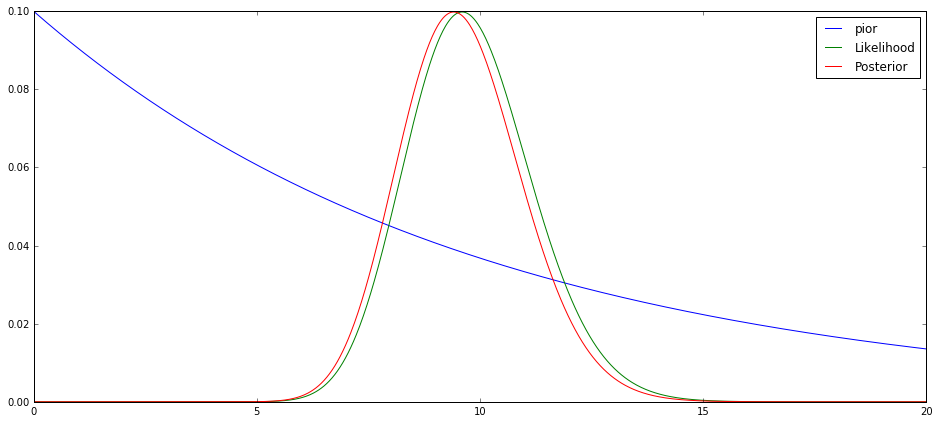

In [326]:
sample = [11,2,14,5,16]
model = "poisson"
pars = {'mu': np.linspace(0, 20, 1000)[1:]}          

prior_model = "expon"
prior_pars = {"scale": 10}        

prior = getattr(stats,prior_model).pdf(pars['mu'], **prior_pars)
scaling = max(prior)

plt.plot(pars['mu'], prior)

likelihood = np.exp(loglikelihood(sample, model, pars))
likelihood = likelihood/max(likelihood) * scaling

plt.plot(pars['mu'], likelihood)

posterior = np.exp(loglikelihood(sample, model, pars)) * getattr(stats, prior_model).pdf(pars['mu'], **prior_pars)
posterior = posterior / max(posterior) * scaling

plt.plot(pars['mu'], posterior)

plt.legend(["pior", "Likelihood", "Posterior"], loc="best")

# Poisson-Exponential posterior is Gamma
#### (This is becuase the exponential (gamma) distribution is "conjugate" to the poisson distribution)

# $\begin{array}
Pp(\theta|X_1,X_2,\cdots,X_n) &\propto \lambda e^{-\lambda \theta} \prod_{i=1}^{n}\frac{\theta^{x_i} e^{-\theta}}{x_i!}\\
&\propto \theta^{^{\sum_{i=1}^{n}x_i}} e^{-(n+\lambda)\theta}\\
&\propto Gamma\left(1+\sum_{i=1}^{n}x_i, n+\lambda\right)
\end{array}$

## And now you can do whatever you want with it

# probabilistic programming
* http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/
* https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/

In [328]:
import pymc as pm

parameter = pm.Exponential("poisson_param", 1./10)
data = np.array([11,2,14,5,16])
#data_generator = pm.Poisson("data_generator_observed", parameter)
data_generator = pm.Poisson("data_generator_observed", parameter, value=data, observed=True)

In [329]:
data_generator.value

array([11,  2, 14,  5, 16])

(0, 20)

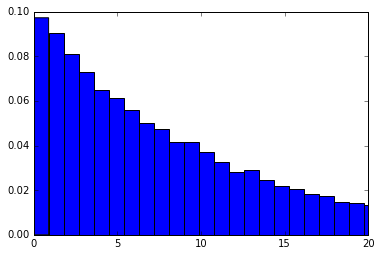

In [330]:
samples = [parameter.random() for i in range(20000)]

from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(samples, bins=100, normed=True)
plt.xlim([0,20])

In [331]:
mcmc = pm.MCMC([data, parameter])
mcmc.sample(1000000, 10000)

 [-----------------100%-----------------] 1000000 of 1000000 complete in 91.0 sec

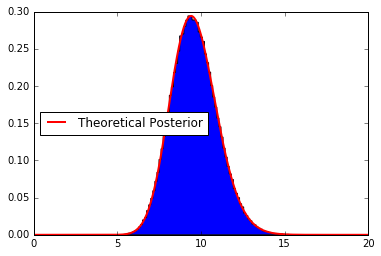

In [334]:
tmp = plt.hist(mcmc.trace("poisson_param")[:], bins=100, histtype="stepfilled", normed=True)
plt.xlim([0,20])

plt.plot(pars['mu'], max(tmp[0])*posterior/max(posterior), color='r', lw=2)
plt.legend(["Theoretical Posterior"], loc="best")

# Bayesians have posterior distributions
- a probability distribution $p(\theta|X_1,X_2,\cdots,X_n)$ over parameter $\theta$ conditional on observable data (_"theta given data"_)
- and can therefore make probabilistic statements about $\theta$
- e.g., the **probability** that $\theta$ is greater than some null hypothesis $H_0: \theta = \theta_0$

### **Bayesian's don't use *statistics***

# What else do Bayesians have?
- A prior where they can put subjective _"prior belief"_ into an analysis
- An easily intreptable and consistent system for "_updating belief"_ after seeing data
- Fully integrated uncertainty propegation in complex hierarchical models 
- Immediate formalization and integration of regularization within a fully coherent framework 


# What do Frequentists have?
- Asymptotic distributional approximations that sometimes work
- $H_0$'s that don't have probabistic interpretations -- they're either right or wrong only
- test statistics and critical values for rejecting null hypothesis $H_0$
   - p-values to measure evidence against the null hypothesis $H_0$
   - p-values aren't the probability that the null is true
- confidence intervals to give plausible ranges for parameters 
- a lot of envy

# How is Bayesian analysis similar to bootstrapping?

### Suppose you have posterior distributions for $\theta_1$ and $\theta_2$: how can you say which is larger?

# Even more context

* Bayesian care _completely_ about uncertainty assessment for the parameters in their model
* Frequentists _do_ characterize uncertainty -- but not at the parameter level 
    * Frequentists characterize the uncertainty (long run "frequency" behavior) of their _estimation procedures_
* Machine Learning procrastenates on examining uncertainty until they examine model predictive performance

# What is a prior?

# What is a posterior?

# Arguments for Bayesian Analysis
* Ease of interpretability

     probability statements about parameters are more easily interpreted than confidence intervals, hypothesis testing and p-values  


* Utilizes _prior_ information

    the Bayesian framework is a natural mechanism to incorporate, build upon and grow information, i.e., learn in an sequential and iterative manner



* No "large n" asymptotic distribution requirements

    Bayesian analysis is a fully coherent probabilistic framework regardless of sample size, whereas many Frequentist methodologies (vaguely) rely upon "large n" results
    
    
* Complex hierarchical data models

    many complicated modeling specifications are _only_ available within the Bayesian computational framework
    
    
* Uncertainty propegation 

     Bayesian analysis provides a hierarchical modeling framework that definitionally incorporates all modeled uncertainty into parameter estimation



* Performs regularization

    the prior specification can stabilize model fitting procedures so they are less prone to overfitting data




# Arguments against Bayesian Analysis
## (and these are substantial; I personally heavily subscribe to the last two subpoints)
## (i.e., _Occam's Razor_ and _Murphy's Law_, yo...)

* _Requires_ specification of the _prior_ 

    allows objectivity to be sacrificed for subjectivity -- arbitrary information can be  incorporated into Bayesian analysis
    
    
* Bayesian computation has more overhead/is more expensive than Frequentist computation on a number of levels:

    * Bayesian analysis requires practitioners with more advanced skill sets

    * Bayesian analysis is more difficult to implement correctly
    
    * simple Frequentist solutions often outperform complex Bayesian solutions at a fraction of total development and computational costs
    

    


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (12, 4)

import numpy as np
import pandas as pd

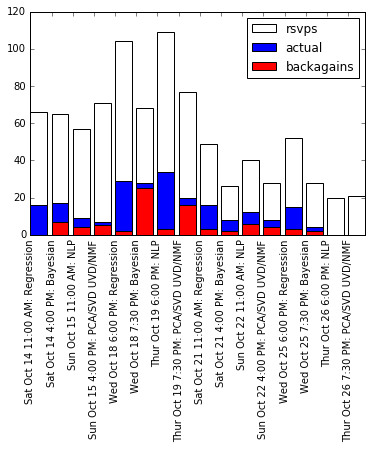

In [337]:
rsvp = np.array([66,65,57,71,104,68,109,77,49,26,40,28,52,28,20,21])
actual = np.array([16, 17, 9, 7, 29, 28, 34, 20,16,8,12,8,15,4,0,0])
repeators = np.array([0, 7, 4, 5, 2, 25, 3, 16,3,2,6,4,3,2,0,0])
title_date = np.array(["Sat Oct 14 11:00 AM: Regression",
"Sat Oct 14 4:00 PM: Bayesian",
"Sun Oct 15 11:00 AM: NLP",
"Sun Oct 15 4:00 PM: PCA/SVD UVD/NMF",
"Wed Oct 18 6:00 PM: Regression",
"Wed Oct 18 7:30 PM: Bayesian",
"Thur Oct 19 6:00 PM: NLP",
"Thur Oct 19 7:30 PM: PCA/SVD UVD/NMF",
"Sat Oct 21 11:00 AM: Regression",
"Sat Oct 21 4:00 PM: Bayesian",
"Sun Oct 22 11:00 AM: NLP",
"Sun Oct 22 4:00 PM: PCA/SVD UVD/NMF",
"Wed Oct 25 6:00 PM: Regression",
"Wed Oct 25 7:30 PM: Bayesian",
"Thur Oct 26 6:00 PM: NLP",
"Thur Oct 26 7:30 PM: PCA/SVD UVD/NMF"])

plt.bar(np.arange(16), rsvp, tick_label=title_date, color="white", label="rsvps")
plt.bar(np.arange(16), actual, label="actual")
plt.bar(np.arange(16), repeators, label="backagains", color="red")
plt.xticks(rotation=90)
plt.legend(loc="best")

# Conclusions


- weekdays NOT weekends


- weekends will be for hackathons (these will require initiation and planning on our part)


- Two rounds of content is feasible
    - We will do a round of content (MW)
    - Followed up by a round of DSI Info Sessions (MW)
    - Python and Part-Time classes are MW so we will make these two days very active to present a very active community 
    - We will start by putting these back to back, but if the audience is sparser than this then we'll add an extra weeks break in between


- better effort regarding email collections must be made
    - this could be offloaded onto DSI information sessions in the future
    
    
- Content increadibly well recieved: **IMPROVED AUDIENCES MUST BE ACQUIRED** *and I must have time to go talk to these audiences*
    - “Such an awesome presentation. I really enjoyed the way Scott presents” — Rui		
    ￼- “I was completely blown away by the quality of the presentation and the ease with which he gave it. Great if you have some technical background (not much is needed) and are curious about the subject. Looking forward to his future lectures!” — Eric
    - “The sessions are very well conducted. Scott used clear and intuitive languages to explain the complex concepts. Very fruitful sessions.” — Andy
    - “Really great meetup - Scott was tremendous” — William
    - “Scott gave an excellent introductory lecture on NLP concepts and tools, and took the time to answer questions from the audience in detail. I would recommend this meetup to everyone interested in this topic.” — Zan
    - “Really great class- can't wait part 2!” — Yonatan
    - “You can feel Dr. Schwartz's enthusiasm in his lecture. He made the subject clear to understand for a topic so complex like this.” — Hsiao
    - “Wow, what a great teacher/instructor Scott is. Great pace and he takes time to answer questions.” — Ferenc
    - “Was a pleasant surprise to go to your class on NLP and dimensionality. Although I live in Houston next time I'm in NY I will have to swing by again!” — James
    - “Thanks for the series of lessons the last few weeks. You convey material very well. I enjoyed them very much. I hope to keep in touch.” — Wilson

### We are looking for the untapped markets/audiences    
    
- Universities
    - Columbia: Andrew Gelman
    - Columbia: Josh Pankin
    - NYU: Bud Mishra
    - CUNY: Marcia Maria Jordine-Green
    - Pace: Sean Daly 
    - ...
    - All mathematics/Statistics/Computer Science departments in town


- Meetups
    - Python + Data Science (2,301 members): Sean Reed
    - Statistical Programming Meetup (8,927 members): Jared Lander 
    - ...
    - Women's meetups
    - ...
    - All meetups with a large and appropriate audience


- I will continue running this content during in house events


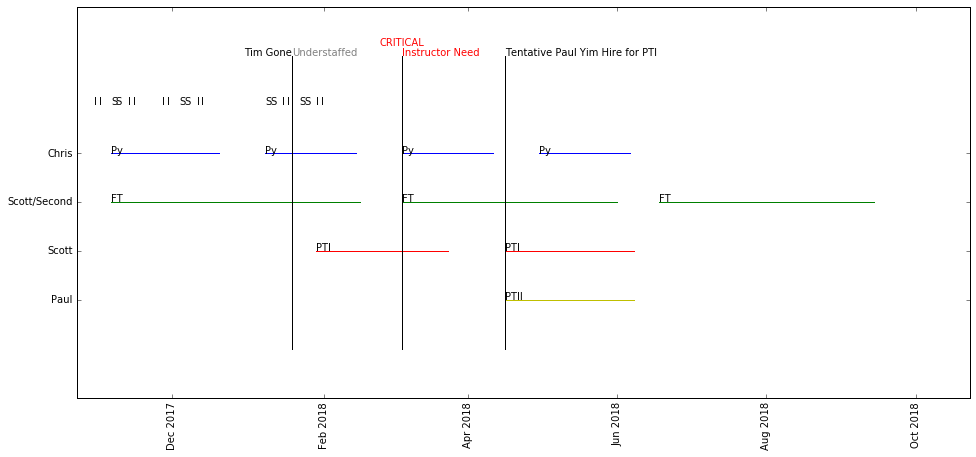

In [72]:
pylab.rcParams['figure.figsize'] = (16, 7)

FT_start = pd.to_datetime(np.array(["11/6/2017","3/5/2018", "6/18/2018"]))
FT_end = pd.to_datetime(np.array(["2/16/2018","6/1/2018", "9/14/2018"]))

Py_start = pd.to_datetime(np.array(["11/6/2017", "1/8/2018", "3/5/2018", "4/30/2018"]))
Py_end = pd.to_datetime(np.array(["12/20/2017", "2/14/2018", "4/11/2018", "6/6/2018"]))

PT1_start = pd.to_datetime(np.array(["1/29/2018","4/16/2018"]))
PT1_end = pd.to_datetime(np.array(["3/24/2018","6/8/2018"]))

PT2_start = pd.to_datetime(np.array(["4/16/2018"]))
PT2_end = pd.to_datetime(np.array(["6/8/2018"]))

S = pd.to_datetime(np.array(["11/6/2017", "11/8/2017", "12/4/2017", "12/6/2017", "1/8/2018", "1/10/2018", "1/22/2018", "1/24/2018"]))

I = pd.to_datetime(np.array(["10/30/2017","11/1/2017","11/13/2017","11/15/2017","11/27/2017","11/29/2017","12/11/2017","12/13/2017","1/15/2018","1/17/2018","1/29/2018","1/31/2018"]))

for d in range(len(FT_start)):
    plt.plot([FT_start[d], FT_end[d]], 2*[0], c='g')
    plt.text(FT_start[d], 0, "FT")
    
for d in range(len(Py_start)):
    plt.plot([Py_start[d], Py_end[d]], 2*[.25], c='b')
    plt.text(Py_start[d], .25, "Py")

for d in range(len(PT1_start)):
    plt.plot([PT1_start[d], PT1_end[d]], 2*[-.25], c='r')
    plt.text(PT1_start[d], -.25, "PTI")

for d in range(len(PT2_start)):
    plt.plot([PT2_start[d], PT2_end[d]], 2*[-.5], c='y')
    plt.text(PT2_start[d], -.5, "PTII")

for d in range(len(S)):
    plt.text(S[d], .5, "S")

for d in range(len(I)):
    plt.text(I[d], .5, "I")

plt.xticks(rotation=90)
plt.ylim([-1,1])
plt.xlim([pd.to_datetime("10/23/2017"), pd.to_datetime("10/23/2018")])

plt.plot(2*[pd.to_datetime("1/19/2018")], [-.75,.75], c='k')
plt.text(pd.to_datetime("1/19/2018"), .75, "Tim Gone", ha='right')
plt.text(pd.to_datetime("1/19/2018"), .75, "Understaffed", ha='left', color='gray')

plt.plot(2*[pd.to_datetime("3/5/2018")], [-.75,.75], c='k')
plt.text(pd.to_datetime("3/5/2018"), .8, "CRITICAL", color='red', ha='center')
plt.text(pd.to_datetime("3/5/2018"), .75, "Instructor Need", color='red')

plt.plot(2*[pd.to_datetime("4/16/2018")], [-.75,.75], c='k')
plt.text(pd.to_datetime("4/16/2018"), .75, "Tentative Paul Yim Hire for PTI")

tmp=plt.yticks([-.5, -.25, 0, .25], ["Paul", "Scott", "Scott/Second", "Chris"])

### It's Chris's job to identify the Python market and steer them towards the DSI

- Chris outreach and promotional events to be added to the above 
    - Web scraping: selenium, beautiful soup, html, css
    - Python with databases: SQL, NoSQL, postgresql, MongoDB
    - Regular expressions: text parsing, extraction; syntax
    - Data Visualizations: Bokeh (Python interactive visualizations comparable to D3.js), D3.js Seaborn, Matplotlib

### It's Scott's job to raise awareness about Galvanize whevever needed and Galvanizes profile therein

- Hackathons must be **DEVELOPED** and added for weekends to the above
    - NYC office of Data Analytics: Adreienne Schmoeker
    - DataKind: Marissa Davis
    - Statistical Programming Meetup (8,927 members): Jared Lander 
    - DataWorld.com — reuse ATX hackathons
    - Continuum Analytics?
    - NYC Social Services Data Science Team: Teresa de Candia
    
    
- Extra events must be added for week nights to the above
    - Matt/Tyler: Alumni Showcases
    - Sean Reed: Python + Data Science
    - Lauren McCarthy: Instadat
    - **Eric Benari: SQL NYC -- The NoSQL & NewSQL Database Meetup (C-suite/VP lectures)** STATUS??
    - Bud/Sam Mishra: NYU Machine Learning/Cyber Security
    - Wirgler ideas: Virtual reality expo; Math Theory for Games
    - Arthur contacts?
    - Sergey Orshanskiy: freelance Mathematics PhD

In [236]:
import numpy as np
import pandas as pd

student = ["drew","clay","skylar","redone","scott","joyce","charlie","Jostine","patrick",
            "glenn","PJ","Paul","Becky","Mark","Rich","Marsy","Charlie","Chi",
            "Earlyn","Annie","Mike","Prakhar","Cindy",
            "Alex","Shawn","Tyler","K","Sanhita","Dylan","Colton","Dan",
                "Chris","Rohan","Rafa","Mi","Nkem","Will","Wallace","Zach",
            "James","Alexandra","Steven","Shane","Chris","Margaret","Michael","Rachel","Kevin",
            "tyler","matt","dan","madhan","chad",
            "Emily", "Tyrone", "Sean", "Nadaa", "David", "Brandon", "Bryce"]

degree = ["BA Political Science; BA Information Technology","BS Engineering",
          "MS Accounting; BS Accounting; BS Computer Information Systems",
          "BS Management and Information Systems; BA Islamic Studies; MBA; Graduate School Math",
          "BS Behavioral Economics","PhD Applied Mathematics","BS Construction Management",
          "MS Petroleum & Geosystems Engineering",
          "BA Philosophy; BS Psychology; MS Psychology; MS Technology Commercialization",
            "MS Applied Mathematics; BS Chemistry","BS Computer Science",
          "MA Public Policy; BA Communications","MS Ecology and Evolutionary Biology",
          "BS Mathematics","MS Software Engineering; MBA",
          "MS Mathematical Finance; BS Mathematics; BS Economics","BS Computer Engineering",
          "MS Computer Science; MBA", "BA Economics","BS Civil Engineering","MS Finance",
          "BS Psychology","BS Mechanical Engineering; MBA","MS Quantiative Finance; MS Physics; BS Physics",
          "MPH Epidemiology of Infectious Diseases; BS Biology","BS Mining and Geological Engineering",
          "MS Geophysics","PhD Astronomy","BS Economics","BS Aerospace Engineering","BS Computer Science",
                "BS Computer Science","BS Mathematics","MS Applied Mathematics","PhD Physics",
          "MS BS Petroleum Engineering","BS Business","BS Chemical Engineering","Dropped Out Economics",
            "BA Government; MPA","PhD Geoscience",
          "BS Electrical and Computer Engineering; Bachelor of Music Performance",
          "MS Mathematics; BS Mathematics and Computer Science","BS Statistics","PhD Journalism",
          "BS Chemical Engineering","BS Chemical Engineering","BS Political Science",
            "MS Computational Biology/Biochemistry; BA Biophysical Chemistry",
          "BA Journalism and History; BA English.","MBA; MA Economics and Government","MS computer Science; MBA",
          "BS Mathematics; BS Econonimics; Dropped out MS",
            "BS Biology", "BS Mathematics", "BS Physics", "MS Laws and Diplomacy; BS International Relations", 
          "BS Information Systems Management", "PhD Physics", "BS Statistics"]

degree_cat = ["BS PoliSci/PubPol","BS Engineering",
          "MS Finance",
          "MBA",
          "BS Economics","PhD Mathematics","BS Engineering",
          "MS Engineering",
          "MS Sciences",
            "MS Mathematics","BS Computer Science",
          "MS PoliSci/PubPol","MS Sciences",
          "BS Mathematics","MBA",
          "MS Finance","BS Engineering",
          "MS Computer Science", "BS Economics","BS Engineering","MS Finance",
          "BS Psychology","BS Engineering","MS Finance",
          "MS Sciences","BS Engineering",
          "MS Sciences","PhD Physics","BS Economics","BS Engineering","BS Computer Science",
                "BS Computer Science","BS Mathematics","MS Mathematics","PhD Physics",
          "MS Engineering","BS PoliSci/PubPol","BS Engineering","BS Economics",
            "MS PoliSci/PubPol","PhD Physics",
          "BS Engineering",
          "MS Mathematics","BS Statistics","PhD Journalism",
          "BS Engineering","BS Engineering","BS PoliSci/PubPol",
            "MS Sciences",
          "BS Journalism","MS PoliSci/PubPol","MS Computer Science",
          "BS Mathematics",
            "BS Sciences", "BS Mathematics", "BS Sciences", "MS PoliSci/PubPol", 
          "BS Engineering", "PhD Physics", "BS Statistics"]

field = ["Political Strategy","Oil and Gas","Public Accounting; Consulting",
         "K to College Teacher (Arabic, Math, Religion, Business)",
         "Education","Materials Research",
         "Heavy Civil Construction industry -- Field Engineer on Light rail train system construction (Half managment, half engineering)",
         "Oil and Gas","Commercial Real Estate",
            "Applied Seismic Research","IT for Retail","Consulting; Healthcare",
         "Ecology and Population Genetics research", "Teacher Math 5th grade","Software Architecture",
         "Renewable Energy Finance","Sales: Intel Hardware/Software Solutions", "Programming",
            "Ecommerce; Retail","Mining engineer (Ops, Maint, Planning, Design, managed 65 people)",
         "Fintech","Teacher HS AP Physics",
         "Middleware Business Consultant (Education, Engineering/Computer Science, Aerospace, IT, Manufacturing, Retail, Government, Telecommunication)",
            "Finance; Real Estate","Drug development, basic biological sciences research","Energy Generation",
         "Oil and Gas","Astronomy Research","Recruiting; Sports Betting","Energy Industry","Programming",
                "Programming","Marketing","Education Curriculum","Seismic Data Analysis, Oil and Gas",
         "Research, Oil and Gas","Music Publishing", 
         "Semiconductors -- Physics modeling and hardware design optimization (CAE)","Web development",
            "Government","Geoscience Research","Electrical Engineering","College Mathematics Instructor",
         "Insurance","Journalism","Oil and Gas","Engineering Management","Middle School Mathematics Teacher",
            "Entrepreneur","Journalism","Fintech","Technology; Software","Health Care",
            "Biology", "Mathematics", "Document Processing", "Finance; Health Care", "Airforce; Business Analyst", 
         "Physics", "Actuary"]

field_cat = ["Policy","Oil and Gas","Accounting",
         "Education","Education","Research","Engineering",
         "Oil and Gas","Real Estate","Oil and Gas","Programming","Consulting",
         "Research", "Education","Programming","Energy","Technical Sales", "Programming",
            "Ecommerce","Engineering","Finance","Education","Consulting",
            "Finance","Research","Energy",
         "Oil and Gas","Research","Recruiting","Energy","Programming",
                "Programming","Marketing","Education","Oil and Gas",
         "Oil and Gas","Publishing", 
         "Semiconductors","Programming",
            "Policy","Research","Engineering","Education",
         "Insurance","Journalism","Oil and Gas","Engineering","Education",
            "Ecommerce","Journalism","Finance","Programming","Health Care",
            "Research", "Education", "Publishing", "Health Care", "Policy", 
         "Research", "Insurance"]


yrs_exper = [.5,5,5,12,0,2,2,0,6,
            14,10,8,12,3,22,3,13,1,
            7,10.5,13,2,19,
            3,5,8,3.5,3,.5,5,3,
                1,2,5,3,.5,2,17,1,
            3,5,4,6,3,4,5,7,2,
            5,10,7,15,13,
            0, 0, 4, 16, 4, 0, 10]

months_to_job = [2,6,6,12,12,2,4,1.5,2,
            2,6.5,2,11,12,12,4,12,np.nan,
            1.5,9.5,12,12,4,
            12,2,3,12,12,12,12,12,
                5,3,1,1.5,.75,2,3,1,
            .25,np.nan,np.nan,.5,np.nan,12,np.nan,np.nan,np.nan,
                 np.nan,np.nan,np.nan,np.nan,np.nan,
            np.nan, 0, np.nan, np.nan, 0, 0, np.nan]

cohort = [1,1,1,1,1,1,1,1,1,
            2,2,2,2,2,2,2,2,2,
            3,3,3,3,3,
            4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
            5,5,5,5,5,5,5,5,5,
            1,1,1,1,1,
             1,1,1,1,1,1,1]

campus = ["ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX",
            "ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX",
            "ATX","ATX","ATX","ATX","ATX",
            "ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX",
                "ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX",
            "ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX","ATX",
            "NYC","NYC","NYC","NYC","NYC",
             "PHX","PHX","PHX","PHX","PHX","PHX","PHX"]

completed = ["Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished",
            "Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished","Left",
            "Finished","Finished","Finished","Finished","Finished",
            "Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished",
                "Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished",
            "Finished","Finished","Finished","Finished","Finished","Finished","Finished","Finished","Left"
            "Finished","Finished","Finished","Finished","Finished",
            "Finished","Finished","Finished","Finished","Finished","Finished","Finished"]

staffing = ["good","good","good","good","good","good","good","good","good",
            "good","good","good","good","good","good","good","good","good",
            "good","good","good","good","good",
            "good","good","good","good","good","good","good","good",
                "good","good","good","good","good","good","good","good",
            "bad","bad","bad","bad","bad","bad","bad","bad","good"
            "medium","medium","medium","medium","medium",
           "good","good","good","good","good","good","good"]

galvy = pd.DataFrame({"yrsExperience":yrs_exper, "months2job":months_to_job, "degree":degree, "degreeSimpler":degree_cat, "Industry":field, "IndustrySimpler":field_cat, "Name":student})

galvy

,Industry,IndustrySimpler,Name,degree,degreeSimpler,months2job,yrsExperience
0,Political Strategy,Policy,drew,BA Political Science; BA Information Technology,BS PoliSci/PubPol,2.00,0.5
1,Oil and Gas,Oil and Gas,clay,BS Engineering,BS Engineering,6.00,5.0
2,Public Accounting; Consulting,Accounting,skylar,MS Accounting; BS Accounting; BS Computer Info...,MS Finance,6.00,5.0
3,"K to College Teacher (Arabic, Math, Religion, ...",Education,redone,BS Management and Information Systems; BA Isla...,MBA,12.00,12.0
4,Education,Education,scott,BS Behavioral Economics,BS Economics,12.00,0.0
5,Materials Research,Research,joyce,PhD Applied Mathematics,PhD Mathematics,2.00,2.0
6,Heavy Civil Construction industry -- Field Eng...,Engineering,charlie,BS Construction Management,BS Engineering,4.00,2.0
7,Oil and Gas,Oil and Gas,Jostine,MS Petroleum & Geosystems Engineering,MS Engineering,1.50,0.0
8,Commercial Real Estate,Real Estate,patrick,BA Philosophy; BS Psychology; MS Psychology; M...,MS Sciences,2.00,6.0
9,Applied Seismic Research,Oil and Gas,glenn,MS Applied Mathematics; BS Chemistry,MS Mathematics,2.00,14.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

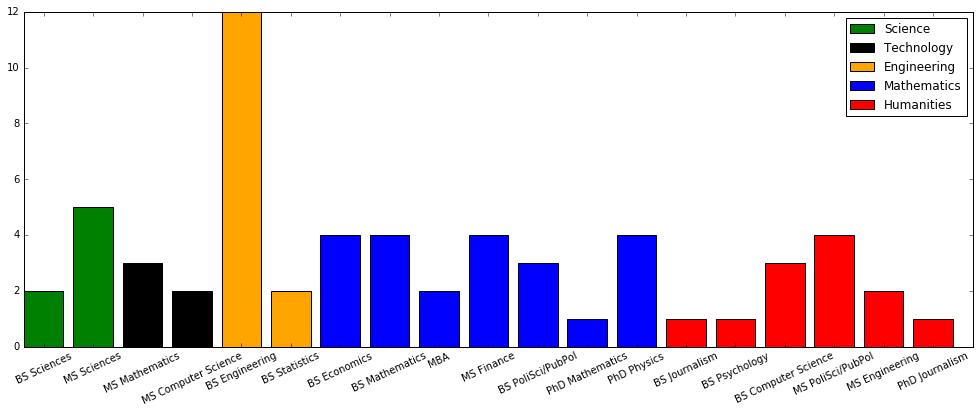

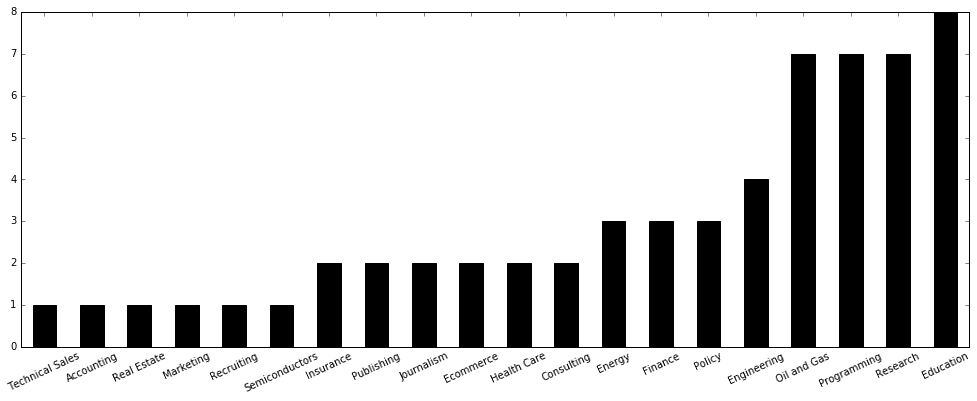

In [237]:
pylab.rcParams['figure.figsize'] = (17, 6)
sci=[12,1]
tech=[7,10]
eng=[0,13]
math=[3,4,11,6,9,17,5]
hum=[16,15,8,2,14,18]
alls=[12,1,7,10,0,13,3,4,11,6,9,17,5,16,15,8,2,14,18]

degree = np.array(galvy.degreeSimpler.value_counts().index)
count = np.array(galvy.degreeSimpler.value_counts())

plt.bar([0,1], count[sci], tick_label=degree[sci], color="green", label="Science")
plt.bar([2,3], count[tech], tick_label=degree[tech], color="black", label="Technology")
plt.bar([4,5], count[eng], tick_label=degree[eng], color="orange", label="Engineering")
plt.bar(range(6,13), count[math], tick_label=degree[math], color="blue", label="Mathematics")
plt.bar(range(13,19), count[hum], tick_label=degree[hum], color="red", label="Humanities")
plt.bar(.4+np.arange(19), 0*np.arange(19), tick_label=degree[alls], color="white")

plt.xticks(rotation=25)
plt.legend(loc="best")

plt.figure()
galvy.IndustrySimpler.value_counts()[::-1].plot.bar(color='k')
plt.xticks(rotation=25)

(-0.5, 3.75)

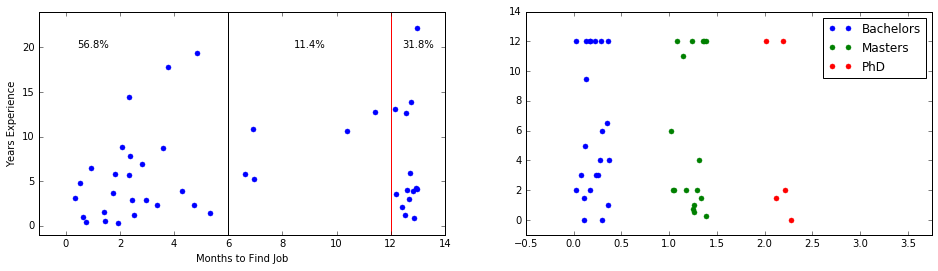

In [319]:
pylab.rcParams['figure.figsize'] = (16, 4)

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(galvy.months2job+np.random.uniform(size=len(galvy.months2job)), galvy.yrsExperience+np.random.uniform(size=len(galvy.months2job)), '.', ms=10)
plt.ylabel("Years Experience")
plt.xlabel("Months to Find Job")
plt.xlim([-1,14])
plt.ylim([-1,24])
plt.plot(2*[12], [-1,24], c='r')
plt.plot(2*[6], [-1,24], c='k')

plt.text(1, 20, str(round(sum(galvy.months2job<6)/float(len(galvy.months2job.dropna())),3)*100)+"%",ha='center')
plt.text(9, 20, str(round(sum((galvy.months2job>=6)*(galvy.months2job<12))/float(len(galvy.months2job.dropna())),3)*100)+"%",ha='center')
plt.text(13, 20, str(round(sum(galvy.months2job==12)/float(len(galvy.months2job.dropna())),3)*100)+"%",ha='center')

ax2 = fig.add_subplot(122)

tmp = galvy.months2job[["BS" in i for i in galvy.degreeSimpler]].dropna()
ax2.plot(0+.4*np.random.uniform(size=len(tmp)), tmp, '.', ms=10, label="Bachelors")
tmp = galvy.months2job[[("MS" in i) or ("MBA" in i) for i in galvy.degreeSimpler]].dropna()
ax2.plot(1+.4*np.random.uniform(size=len(tmp)), tmp, '.', ms=10, label="Masters")
tmp = galvy.months2job[["PhD" in i for i in galvy.degreeSimpler]].dropna()
ax2.plot(2+.4*np.random.uniform(size=len(tmp)), tmp, '.', ms=10, label="PhD")
plt.legend(loc="best")
plt.ylim([-1,14])
plt.xlim([-.5,3.75])

# Conclusions

- Impressive individuals get impressive jobs
- MS degrees are the most suggestive of impressive individuals
- Many people flame out and never recover
- **DO NOT show time to job statistics**, because they suck
- Do show student demographic information, **because students will find that interesting**


In the same vain
- Do show other information that looks impressive, because
- **we need to attract a higher calibur of student than what we're getting at the moment...**

Envisioned Student Demographics 
- Graduates (alumni network size)
- Cohorts (program experience)
- Companies giving talks (connections)
- Companies on campus (connections)
- Degree distribution (incoming student profile)
- Background distribution (incoming student profile)
- Experience distribution (incoming student profile)

Envisioned Content 
- Flushed out expectations of curriculum 
- Up to date schedule of events
- Links to “Data Science Sexiest Discipline right now” https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm)


Would like to have our google search results improved...

# Addendum

- Website
    - Am assessming website and performing a market comparison
    - Am reaching out to Seattle/CO to ask if they're interested in doing the same
    - I am designing and collecting the information that I think should go on the website
    - I am working with Ben on this to collect this data

    
- I would like time to scrape indeed.com
    - produce a report for the website that says what jobs want in NYC
    - get this set as part of the website content


- coursereport.com 
    - I have reached out to 52 students already, personally
    - I will reach out the same 52 again for some additional data
    - I will then finally reach out to 33-52 students to personally request they post a review
    - +7 from PHX help
    - Am reaching out to Seattle/CO to ask if they're interested in doing the same

# Outlook

Losses
- ~~Brad Solomon~~
- ~~Melissa Swats~~
- ~~Ruben Rodriguez~~
- ~~Alexandra Duboy~~
- ~~Kate Lazell~~

Expected Losses
- ~~Trevor Drummon~~
- ~~Jack Kepley~~
- ~~Shailendra Srivastava~~

Expected Yes
- *Michael Woline* (partial tuition)
- *Katie Gross*  (partial tuition)
- Jamie Schwartz
- Randall lueng
- Forest Polchow

Maybe
- Russell Stack
- Kevin Hsu

Expected Defer
- ~~Michael Knight~~
- ~~Lauren Wiener~~

## When you, Mike, learn that we've lost a student, you feel how I feel every day I work here
#### While I do understand you are able to present things as though we're making progress, the actual state of the DSI is ANYTHING BUT 

# Chris has done a great job with the students, getting them as Python capable as possible with nowhere near enough time to do so
### If we do actual convert any of these students it's because they've had an amazing experience with Chris
### (and I like to think I helped pitch in as well by providing a weeks worth of impromptu lectures)

- I create and put on 16 lectures over weekends and weeknights at the drop of the hat
    - I am given sassy bitch attitude from Terence ("We need to talk..." as if I don't have 10 other much more pressing things to do)and dismissively lectured like a child about "Protocol" 
    - **Not putting up with this**
    
    
- I manage to create *some* interest via these efforts in the hope of a hail Mary conversion, and
    - the prospective student I invite leaves because "I came for a while but they wouldn't let me in so I left for my other office to do some work."
    - I tell Mary Beth to show my visitors the courtesy of letting them into the building, and she tells me "no", and then Mike tells me "no".
    - **Not putting up with this**
    

- I single handedly contact 52 students with individual, personalized messages and collect their data as a first step to getting them to put positive reviews of Galvanize up on coursereport.com, as organize the same for 7 other students at another campus, and
    - I ask Arthur to begin this process for SF/CO/Seattle, and he manages to do *nothing* in this regard over the span of 11 days
    - **Not putting up with this**
    
    
# When I say jump, everyone says "How High?" If they don't, they're in my way.

# Get where I'm coming from?
- You may feel it's "give an inch, take a mile" with me; that you've made the wrong choice and let the enemy in... but people need to just get out of my way so I can do what needs to be done.  They will be fine not having me as a friend. 

In [ ]:
Gung ho and branching out and meeting new people and repeatedly hitting old connections
What are your ideas? Do you know what to do?
Outgoing, easily likable
What are your ideas?

In [ ]:
startups
coworking
educational classes

accelerator -- startups: this was her connection to 
moved to NYC recently

